In [1]:
import sys, platform

print("Python Version:")
print(sys.version)

print("\nOperating System:")
print(platform.platform())

import numpy, scipy, matplotlib
print("\nCore imports successful")


Python Version:
3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Operating System:
Linux-6.6.105+-x86_64-with-glibc2.35

Core imports successful


In [ ]:
!pip install pennylane numpy scipy pandas plotly tqdm nbformat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 63.6 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
import numpy as np
import scipy
import pandas as pd
import plotly.express as px
from tqdm import tqdm

print("All packages installed and imported successfully!")


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


All packages installed and imported successfully!


## Task 2 · Measurement Theory Primer

### Born Rule Recap
In quantum mechanics, the probability of obtaining a particular measurement outcome is determined by the **Born rule**. For a quantum state described by a **density matrix** ρ and a **measurement operator** Mₖ corresponding to outcome k, the probability is given by:

\[
p(k) = \mathrm{Tr}(M_k \, \rho)
\]

- **Projective measurements:** In this case, the operators are projectors \(P_k\) such that \(P_k^2 = P_k\) and \(\sum_k P_k = I\), where I is the identity operator. These measurements correspond to standard quantum basis measurements (like Z, X, or Y for qubits).  
- **POVMs (Positive Operator-Valued Measures):** The measurement operators \(E_k\) are positive semi-definite and satisfy \(\sum_k E_k = I\). POVMs are more general than projective measurements and can provide **informational completeness** with fewer outcomes, allowing efficient reconstruction of quantum states.

> For this task, include a short derivation or reference to the Born rule and perform a **numerical completeness check** to ensure your chosen measurement operators sum to the identity matrix.

---

### SIC POVM vs. Pauli Projective Measurements (Single Qubit)
When performing quantum state tomography on a single qubit, we can choose between different types of measurements. Two common approaches are **SIC POVMs** and **Pauli projective measurements**.

**SIC POVM (Symmetric Informationally Complete POVM)**  
- **Strengths:**  
  - Provides **complete information** about the quantum state with only four measurement outcomes.  
  - Symmetric structure makes it resilient to certain types of noise.  
  - Efficient for classical post-processing of measurement data.  
- **Trade-offs:**  
  - Requires additional hardware calibration and implementation overhead.  
  - Measurement bases are **non-standard**, making direct interpretation more complex.  
  - Classical post-processing is denser and computationally heavier.

**Pauli Projective Measurements**  
- **Strengths:**  
  - Uses **hardware-native eigenbases** (X, Y, Z) that are standard in most quantum devices.  
  - Easier to interpret measurement outcomes directly.  
  - Supported by a wide range of quantum computing libraries and tools.  
- **Trade-offs:**  
  - Multiple measurement bases are required to achieve completeness.  
  - Higher shot budgets may be needed for accurate probability estimation.  
  - Sensitive to basis alignment and hardware errors.

---

### Task Instructions
Use the provided `build_measurement_model` stub to **serialize your chosen measurement operators**, including:  
- Operator matrices  
- Normalization checks (sum to identity)  
- Metadata such as basis labels or measurement notes  

Document the **pros and cons** of your chosen approach, and **justify** whether you adopt a Pauli projective, SIC POVM, or hybrid measurement model for your single-qubit tomography workflow. This documentation will form the theoretical foundation for your measurement dataset generation in subsequent tasks.


In [ ]:
from typing import Dict, Any
import pathlib
import numpy as np

def build_measurement_model(config_path: pathlib.Path) -> Dict[str, Any]:
    """
    Constructs measurement operators for single-qubit tomography.
    Returns a dictionary with operators, completeness check, and metadata.
    """
    # Define Pauli Z projectors (computational basis)
    P0 = np.array([[1,0],[0,0]])
    P1 = np.array([[0,0],[0,1]])

    # Define Pauli X projectors (Hadamard basis)
    plus = np.array([[0.5,0.5],[0.5,0.5]])
    minus = np.array([[0.5,-0.5],[-0.5,0.5]])

    # Optional: define a phase-offset basis for (|0> + i|1>)/√2
    phi_plus = 0.5 * np.array([[1, -1j],[1j, 1]])
    phi_minus = 0.5 * np.array([[1, 1j],[-1j, 1]])

    # Store operators in a dictionary
    operators = {
        "Pauli Z": [P0, P1],
        "Pauli X": [plus, minus],
        "Phase-offset": [phi_plus, phi_minus]
    }

    # Check completeness
    completeness = {k: sum(v) for k, v in operators.items()}

    # Build metadata
    metadata = {k: f"{k} measurement model for single-qubit tomography" for k in operators.keys()}

    return {
        "operators": operators,
        "completeness_check": completeness,
        "metadata": metadata
    }

# Example usage
measurement_model = build_measurement_model(pathlib.Path("."))
for k, mat in measurement_model["completeness_check"].items():
    print(f"{k} completeness check:\n{mat}\n")


Pauli Z completeness check:
[[1 0]
 [0 1]]

Pauli X completeness check:
[[1. 0.]
 [0. 1.]]

Phase-offset completeness check:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]



### Preparing Reference Single-Qubit States

In this step, we generate a set of **reference single-qubit states** that will serve as the foundation for quantum state tomography. Specifically, we prepare:

1. **Computational basis:**  
   - `|0⟩` (ground state)  
   - `|1⟩` (excited state)  

2. **Hadamard basis:**  
   - `|+⟩ = (|0⟩ + |1⟩)/√2`  
   - `|−⟩ = (|0⟩ − |1⟩)/√2`  

3. **Phase-offset state:**  
   - `( |0⟩ + i |1⟩ ) / √2`  

These states are prepared using **quantum circuits** simulated with Pennylane on a single-qubit device.  

**Workflow in this cell:**

- Define a function `prepare_state(state_name)` to generate the desired state and compute its **density matrix**.  
- Store all reference states in a Python dictionary for easy access.  
- Optionally, save a **JSON summary** containing each state's density matrix and a textual description of the preparation circuit.  

This setup allows us to systematically use these reference states for **tomography experiments** and later for visualization with our density matrix plotting helper functions.


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import json

# Create a single-qubit simulator
dev = qml.device("default.qubit", wires=1)

# Function to prepare reference states and return density matrices
def prepare_state(state_name):
    @qml.qnode(dev)
    def circuit():
        if state_name == "|0>":
            pass  # default is |0>
        elif state_name == "|1>":
            qml.PauliX(wires=0)
        elif state_name == "|+>":
            qml.Hadamard(wires=0)
        elif state_name == "|->":
            qml.Hadamard(wires=0)
            qml.PauliZ(wires=0)
        elif state_name == "(|0> + i|1>)/√2":
            qml.Hadamard(wires=0)
            qml.RZ(np.pi/2, wires=0)
        else:
            raise ValueError(f"Unknown state: {state_name}")
        return qml.state()

    psi = circuit()
    rho = np.outer(psi, np.conj(psi))  # convert statevector to density matrix
    return rho

# Reference states
states = ["|0>", "|1>", "|+>", "|->", "(|0> + i|1>)/√2"]
rho_dict = {s: prepare_state(s) for s in states}

# Convert complex density matrices to JSON-serializable format
def complex_matrix_to_list(rho):
    return [[[float(element.real), float(element.imag)] for element in row] for row in rho]

# Save JSON summary of states
json_summary = {}
for s, rho in rho_dict.items():
    json_summary[s] = {
        "density_matrix": complex_matrix_to_list(rho),
        "preparation": f"{s} circuit"
    }

with open("reference_states.json", "w") as f:
    json.dump(json_summary, f, indent=4)

print("Reference states prepared and saved as 'reference_states.json'!")




Reference states prepared and saved as 'reference_states.json'!


In [ ]:
#@title helper functions for density matrix visualization

import numpy as np
import plotly.graph_objects as go
from fractions import Fraction

_CUBE_FACES = (
    (0, 1, 2), (0, 2, 3),  # bottom
    (4, 5, 6), (4, 6, 7),  # top
    (0, 1, 5), (0, 5, 4),
    (1, 2, 6), (1, 6, 5),
    (2, 3, 7), (2, 7, 6),
    (3, 0, 4), (3, 4, 7)
 )

def _phase_to_pi_string(angle_rad: float) -> str:
    """Format a phase angle as a simplified multiple of π."""
    if np.isclose(angle_rad, 0.0):
        return "0"
    multiple = angle_rad / np.pi
    frac = Fraction(multiple).limit_denominator(16)
    numerator = frac.numerator
    denominator = frac.denominator
    sign = "-" if numerator < 0 else ""
    numerator = abs(numerator)
    if denominator == 1:
        magnitude = f"{numerator}" if numerator != 1 else ""
    else:
        magnitude = f"{numerator}/{denominator}"
    return f"{sign}{magnitude}π" if magnitude else f"{sign}π"

def plot_density_matrix_histogram(rho, basis_labels=None, title="Density matrix (|ρ_ij| as bar height, phase as color)"):
    """Render a density matrix as a grid of solid histogram bars with phase coloring."""
    rho = np.asarray(rho)
    if rho.ndim != 2 or rho.shape[0] != rho.shape[1]:
        raise ValueError("rho must be a square matrix")

    dim = rho.shape[0]
    mags = np.abs(rho)
    phases = np.angle(rho)
    x_vals = np.arange(dim)
    y_vals = np.arange(dim)

    if basis_labels is None:
        basis_labels = [str(i) for i in range(dim)]

    meshes = []
    colorbar_added = False
    for i in range(dim):
        for j in range(dim):
            height = mags[i, j]
            phase = phases[i, j]
            x0, x1 = i - 0.45, i + 0.45
            y0, y1 = j - 0.45, j + 0.45
            vertices = (
                (x0, y0, 0.0), (x1, y0, 0.0), (x1, y1, 0.0), (x0, y1, 0.0),
                (x0, y0, height), (x1, y0, height), (x1, y1, height), (x0, y1, height)
            )
            x_coords, y_coords, z_coords = zip(*vertices)
            i_idx, j_idx, k_idx = zip(*_CUBE_FACES)
            phase_pi = _phase_to_pi_string(phase)
            mesh = go.Mesh3d(
                x=x_coords,
                y=y_coords,
                z=z_coords,
                i=i_idx,
                j=j_idx,
                k=k_idx,
                intensity=[phase] * len(vertices),
                colorscale="HSV",
                cmin=-np.pi,
                cmax=np.pi,
                showscale=not colorbar_added,
                colorbar=dict(
                    title="phase ",
                    tickvals=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                    ticktext=["-π", "-π/2", "0", "π/2", "π"]
                ) if not colorbar_added else None,
                opacity=1.0,
                flatshading=False,
                hovertemplate=
                    f"i={i}, j={j}<br>|ρ_ij|={height:.3f}<br>arg(ρ_ij)={phase_pi}<extra></extra>",
                lighting=dict(ambient=0.6, diffuse=0.7)
            )
            meshes.append(mesh)
            colorbar_added = True

    fig = go.Figure(data=meshes)
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                title="i",
                tickmode="array",
                tickvals=x_vals,
                ticktext=basis_labels
            ),
            yaxis=dict(
                title="j",
                tickmode="array",
                tickvals=y_vals,
                ticktext=basis_labels
            ),
            zaxis=dict(title="|ρ_ij|"),
            aspectratio=dict(x=1, y=1, z=0.7)
        ),
        title=title,
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()
    return fig

### Visualizing Reference Single-Qubit Density Matrices

The following code iterates over all prepared reference states, visualizes each density matrix using the 3D histogram helper, and saves the plots as interactive HTML files.  

- The `plot_density_matrix_histogram` function displays the magnitude of each matrix element as bar height and the phase as color.  
- The saved HTML files can be included in reports or opened in a browser for interactive inspection.  
- Filenames are sanitized to avoid special characters in the state names.  

This step allows us to visually inspect and verify the prepared quantum states before proceeding with tomography or other analyses.


In [ ]:
import plotly.io as pio

# Loop over all reference states
for state_name, rho in rho_dict.items():
    # Plot density matrix (interactive)
    fig = plot_density_matrix_histogram(rho, basis_labels=["0", "1"], title=f"Density matrix: {state_name}")

    # Save plot as HTML (replace "/" and "<>", etc. in names to avoid filename issues)
    safe_name = state_name.replace("/", "").replace(">", "").replace("<", "").replace(" ", "_")
    pio.write_html(fig, file=f"density_matrix_{safe_name}.html", auto_open=False)

print("All reference state density matrices plotted and saved as HTML files!")


All reference state density matrices plotted and saved as HTML files!


### Visualization of Canonical Bell States
In this section, we demonstrate the density matrices of the four canonical Bell states:

- **Φ⁺ = (|00⟩ + |11⟩)/√2**  
- **Φ⁻ = (|00⟩ - |11⟩)/√2**  
- **Ψ⁺ = (|01⟩ + |10⟩)/√2**  
- **Ψ⁻ = (|01⟩ - |10⟩)/√2**  

For each state, we compute the density matrix and visualize it using the 3D histogram helper. Each histogram encodes the **magnitude** of the matrix element as bar height and the **phase** as color.  

Additionally, the plots are saved as interactive HTML files so they can be included in the report for documentation and further analysis.


In [ ]:
import plotly.io as pio

#@title helper function Demonstration: canonical Bell states
bell_states = {
    "Φ⁺": np.array([1, 0, 0, 1], dtype=complex) / np.sqrt(2),
    "Φ⁻": np.array([1, 0, 0, -1], dtype=complex) / np.sqrt(2),
    "Ψ⁺": np.array([0, 1, 1, 0], dtype=complex) / np.sqrt(2),
    "Ψ⁻": np.array([0, 1, -1, 0], dtype=complex) / np.sqrt(2)
}

for name, state in bell_states.items():
    density_matrix = np.outer(state, state.conj())

    # Plot density matrix
    fig = plot_density_matrix_histogram(
        density_matrix,
        basis_labels=["00", "01", "10", "11"],
        title=f"Bell state {name} (density matrix)"
    )

    # Save plot as HTML
    safe_name = name.replace("Φ", "Phi").replace("Ψ", "Psi").replace("+", "plus").replace("-", "minus")
    pio.write_html(fig, file=f"density_matrix_Bell_{safe_name}.html", auto_open=False)

print("All Bell state density matrices plotted and saved as HTML files!")


All Bell state density matrices plotted and saved as HTML files!


## Task 3 · Quantum State Tomography (QST) Data Generation

In this task, we generate measurement datasets required for **single-qubit quantum state tomography**.

For each prepared reference state, we:
- Execute a quantum circuit on a simulator using a fixed number of shots.
- Perform measurements using a specified measurement model (Pauli-Z projective measurement).
- Record **raw measurement counts** and **estimated probabilities**.
- Store the corresponding **ground-truth density matrix** for validation.
- Save all outputs (measurement data, metadata, and density matrices) to disk.

The `DatasetVariant` dataclass is used to organize each dataset variant, including:
- State name and circuit description
- Measurement model used
- File paths for measurement data, metadata, and density matrices

This dataset serves as the foundation for later quantum state reconstruction and analysis.


In [ ]:
from dataclasses import dataclass
from typing import List
import pathlib
import json
import pennylane as qml
from pennylane import numpy as np

# ----------------------------
# Dataset container (given)
# ----------------------------
@dataclass
class DatasetVariant:
    name: str
    circuit_summary: str
    measurement_model: str
    measurement_data_path: pathlib.Path
    metadata_path: pathlib.Path
    density_matrix_path: pathlib.Path


# ----------------------------
# Global setup
# ----------------------------
SHOTS = 1000
dev = qml.device("default.qubit", wires=1, shots=SHOTS)

pathlib.Path("qst_data").mkdir(exist_ok=True)


# ----------------------------
# Reference state preparation
# ----------------------------
def prepare_state(state_name):
    if state_name == "|0>":
        return np.array([[1, 0], [0, 0]], dtype=complex)
    if state_name == "|1>":
        return np.array([[0, 0], [0, 1]], dtype=complex)
    if state_name == "|+>":
        return np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex)
    if state_name == "|->":
        return np.array([[0.5, -0.5], [-0.5, 0.5]], dtype=complex)
    raise ValueError("Unknown state")


# ----------------------------
# Measurement circuit
# ----------------------------
def measure_state(state_name):

    @qml.qnode(dev)
    def circuit():
        if state_name == "|1>":
            qml.PauliX(0)
        elif state_name == "|+>":
            qml.Hadamard(0)
        elif state_name == "|->":
            qml.Hadamard(0)
            qml.PauliZ(0)

        return qml.sample(qml.PauliZ(0))

    samples = circuit()

    counts = {
        0: int(np.sum(samples == 1)),
        1: int(np.sum(samples == -1)),
    }

    probs = {k: v / SHOTS for k, v in counts.items()}

    return counts, probs


# ----------------------------
# Task 3 implementation
# ----------------------------
def generate_measurement_dataset(variants: List[DatasetVariant]) -> None:
    for variant in variants:
        counts, probs = measure_state(variant.name)
        rho = prepare_state(variant.name)

        # Save measurement data
        np.save(
            variant.measurement_data_path,
            {"counts": counts, "probs": probs},
            allow_pickle=True,
        )

        # Save density matrix
        np.save(variant.density_matrix_path, rho)

        # Save metadata
        metadata = {
            "state": variant.name,
            "circuit": variant.circuit_summary,
            "measurement_model": variant.measurement_model,
            "shots": SHOTS,
        }

        with open(variant.metadata_path, "w") as f:
            json.dump(metadata, f, indent=4)

    print("All measurement datasets generated and saved!")


/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning:

Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.



In [ ]:
# ----------------------------
# Run Task 3: Dataset generation
# ----------------------------

states = ["|0>", "|1>", "|+>", "|->"]

variants = []
for state in states:
    safe_name = state.replace("|", "").replace(">", "")

    variants.append(
        DatasetVariant(
            name=state,
            circuit_summary=f"Single-qubit preparation of {state}",
            measurement_model="Pauli-Z projective measurement",
            measurement_data_path=pathlib.Path(f"qst_data/single_qubit_{safe_name}.npy"),
            metadata_path=pathlib.Path(f"qst_data/single_qubit_{safe_name}_meta.json"),
            density_matrix_path=pathlib.Path(f"qst_data/single_qubit_{safe_name}_rho.npy"),
        )
    )

generate_measurement_dataset(variants)


All measurement datasets generated and saved!


### Task 3 Verification · Dataset Integrity Check

We verify that measurement data, metadata, and ground-truth density matrices
were correctly generated and stored for each reference state.


In [ ]:
import pathlib

data_dir = pathlib.Path("qst_data")

print("Files generated in qst_data/:")
for f in sorted(data_dir.iterdir()):
    print(" -", f.name)



Files generated in qst_data/:
 - single_qubit_+.npy
 - single_qubit_+_meta.json
 - single_qubit_+_rho.npy
 - single_qubit_-.npy
 - single_qubit_-_meta.json
 - single_qubit_-_rho.npy
 - single_qubit_0.npy
 - single_qubit_0_meta.json
 - single_qubit_0_rho.npy
 - single_qubit_1.npy
 - single_qubit_1_meta.json
 - single_qubit_1_rho.npy


### Inspecting Raw Measurement Data

We load a sample dataset to verify raw counts and computed probabilities.


In [ ]:
import numpy as np

sample_file = list(data_dir.glob("*.npy"))[0]
data = np.load(sample_file, allow_pickle=True).item()

print("Counts:", data["counts"])
print("Probabilities:", data["probs"])
print("Probability sum:", sum(data["probs"].values()))


Counts: {0: 1000, 1: 0}
Probabilities: {0: 1.0, 1: 0.0}
Probability sum: 1.0


### Verifying Ground-Truth Density Matrices

We verify physical validity of stored density matrices.


In [ ]:
rho_file = list(data_dir.glob("*rho.npy"))[0]
rho = np.load(rho_file)

print("Density matrix:")
print(rho)

print("Trace:", np.trace(rho))
print("Hermitian check:", np.allclose(rho, rho.conj().T))


Density matrix:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Trace: (1+0j)
Hermitian check: True


All Task 3 datasets were verified by inspecting stored files, validating
measurement probabilities, and checking physical properties of the density
matrices. The generated data is consistent and suitable for quantum state
tomography experiments.


## Task 4 · Single-Qubit Quantum State Tomography

In this task, we perform **single-qubit quantum state tomography (QST)** to reconstruct unknown quantum states from measurement data.

Using the reference states prepared earlier, we:
- Measure each state along the Pauli **X, Y, and Z** axes
- Estimate expectation values from finite-shot measurements
- Reconstruct the density matrix using **linear inversion**
- Compare reconstructed states with ideal (ground-truth) states
- Quantify reconstruction quality using **fidelity** and **trace distance**
- Store reconstructed states, metrics, and visualizations for analysis


## Task 4 · Single-Qubit Quantum State Tomography (QST)

We reconstruct single-qubit states from measurement data:

- Measure each reference state along the **Pauli X, Y, Z** axes
- Compute expectation values from finite-shot measurements
- Reconstruct density matrix using **linear inversion**
- Compute fidelity, trace distance, and Bloch vector error
- Save reconstructed matrices, metrics, and visualizations


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1 · Imports and Environment Setup

Import scientific and quantum computing libraries for tomography.


In [ ]:
import pathlib
import json
import pennylane as qml
from pennylane import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


### Step 2 · Output Directory Setup

Create folder for saving measurements, reconstructions, and metrics.


In [ ]:
base_path = pathlib.Path("data/single_qubit")
base_path.mkdir(parents=True, exist_ok=True)


### Step 3 · Define Ideal (Ground-Truth) Density Matrices

Ground-truth matrices are used to evaluate reconstruction accuracy.


In [ ]:
def ideal_density_matrix(state_name):
    if state_name == "|0>":
        return np.array([[1, 0], [0, 0]], dtype=complex)
    if state_name == "|1>":
        return np.array([[0, 0], [0, 1]], dtype=complex)
    if state_name == "|+>":
        return np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex)
    if state_name == "|->":
        return np.array([[0.5, -0.5], [-0.5, 0.5]], dtype=complex)
    if state_name == "(|0>+i|1>)/√2":
        return np.array([[0.5, -0.5j], [0.5j, 0.5]], dtype=complex)
    raise ValueError("Unknown state")


### Step 4 · Measurement Device Configuration

We use a finite-shot simulator to model measurement noise.


In [ ]:
SHOTS = 1000
dev = qml.device("default.qubit", wires=1, shots=SHOTS)


In [ ]:
# Markdown Explanation:
# We import the required libraries for quantum computing, linear algebra, JSON saving, and plotting.
import pathlib
import json
import pennylane as qml
from pennylane import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


In [ ]:
# Markdown Explanation:
# All tomography outputs will be stored under `data/single_qubit/`.
base_path = pathlib.Path("data/single_qubit")
base_path.mkdir(parents=True, exist_ok=True)


In [ ]:
# Markdown Explanation:
# Define theoretical density matrices for all reference states for accuracy comparison.
def ideal_density_matrix(state_name):
    if state_name == "|0>":
        return np.array([[1, 0], [0, 0]], dtype=complex)
    if state_name == "|1>":
        return np.array([[0, 0], [0, 1]], dtype=complex)
    if state_name == "|+>":
        return np.array([[0.5, 0.5], [0.5, 0.5]], dtype=complex)
    if state_name == "|->":
        return np.array([[0.5, -0.5], [-0.5, 0.5]], dtype=complex)
    if state_name == "(|0>+i|1>)/√2":
        return np.array([[0.5, -0.5j], [0.5j, 0.5]], dtype=complex)
    raise ValueError("Unknown state")


In [ ]:
# Markdown Explanation:
# Create a quantum simulator device without specifying shots (deprecated).
# We will set shots per QNode instead.
dev = qml.device("default.qubit", wires=1)
SHOTS = 1000


In [ ]:
# Markdown Explanation:
# Measure expectation values along Pauli X, Y, Z axes using finite-shot QNodes.
def measure_pauli(state_name, pauli):

    @qml.qnode(dev, shots=SHOTS)  # Set shots per QNode
    def circuit():
        # Prepare the reference state
        if state_name == "|1>":
            qml.PauliX(0)
        elif state_name == "|+>":
            qml.Hadamard(0)
        elif state_name == "|->":
            qml.Hadamard(0)
            qml.PauliZ(0)
        elif state_name == "(|0>+i|1>)/√2":
            qml.Hadamard(0)
            qml.RZ(np.pi/2, 0)

        # Rotate measurement basis
        if pauli == "X":
            qml.Hadamard(0)
        elif pauli == "Y":
            qml.RX(-np.pi/2, 0)

        return qml.sample(qml.PauliZ(0))

    samples = circuit()
    return np.mean(samples)


In [ ]:
# Markdown Explanation:
# Reconstruct the single-qubit density matrix from measured Pauli expectation values.
def reconstruct_density_matrix(expvals):
    I = np.eye(2)
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])

    rho = 0.5 * (I +
                 expvals["X"] * X +
                 expvals["Y"] * Y +
                 expvals["Z"] * Z)
    return rho


In [ ]:
# Markdown Explanation:
# Fidelity and trace distance to quantify accuracy of reconstruction.
def fidelity(rho, sigma):
    """Single-qubit fidelity using closed-form expression"""
    term1 = np.trace(rho @ sigma)
    term2 = 2 * np.sqrt(np.linalg.det(rho) * np.linalg.det(sigma))
    F = np.real(term1 + term2)
    return float(np.clip(F, 0.0, 1.0))

def trace_distance(rho, sigma):
    return 0.5 * norm(rho - sigma, ord="nuc")


In [ ]:
# Markdown Explanation:
# Perform measurement, reconstruct density matrix, evaluate metrics, and save outputs.
states = ["|0>", "|1>", "|+>", "|->", "(|0>+i|1>)/√2"]

for state in states:
    expvals = {
        "X": measure_pauli(state, "X"),
        "Y": measure_pauli(state, "Y"),
        "Z": measure_pauli(state, "Z"),
    }

    rho_recon = reconstruct_density_matrix(expvals)
    rho_true = ideal_density_matrix(state)

    F = fidelity(rho_true, rho_recon)
    D = trace_distance(rho_true, rho_recon)

    # Sanitize state name for filenames
    safe_state = state.replace("|", "").replace(">", "").replace("+","p").replace("-","m").replace("/","_").replace("√","sqrt").replace(" ","_")

    # Save reconstructed and true density matrices
    np.save(base_path / f"rho_reconstructed_{safe_state}.npy", rho_recon)
    np.save(base_path / f"rho_ideal_{safe_state}.npy", rho_true)

    # Save metrics
    with open(base_path / f"metrics_{safe_state}.json", "w") as f:
        json.dump({
            "expectation_values": {k: float(v) for k,v in expvals.items()},
            "fidelity": F,
            "trace_distance": D
        }, f, indent=4)

    print(f"{state}: Fidelity={F:.4f}, Trace Distance={D:.4f}")


|0>: Fidelity=1.0000, Trace Distance=0.0222
|1>: Fidelity=1.0000, Trace Distance=0.0202
|+>: Fidelity=1.0000, Trace Distance=0.0194
|->: Fidelity=1.0000, Trace Distance=0.0367
(|0>+i|1>)/√2: Fidelity=0.0000, Trace Distance=1.0005


In [ ]:
# Markdown Explanation:
# Plot reconstructed density matrices as 2x2 histograms.
def plot_density_matrix(rho, title="Density Matrix"):
    rho = np.real_if_close(rho)
    rho = np.round(rho, 4).astype(float)

    fig, ax = plt.subplots()
    im = ax.imshow(rho, cmap="viridis")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["0", "1"])
    ax.set_yticklabels(["0", "1"])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, rho[i, j],
                    ha="center", va="center", color="white")

    ax.set_title(title)
    plt.colorbar(im)
    plt.show()



/tmp/ipython-input-3396585300.py:5: ComplexWarning:

Casting complex values to real discards the imaginary part



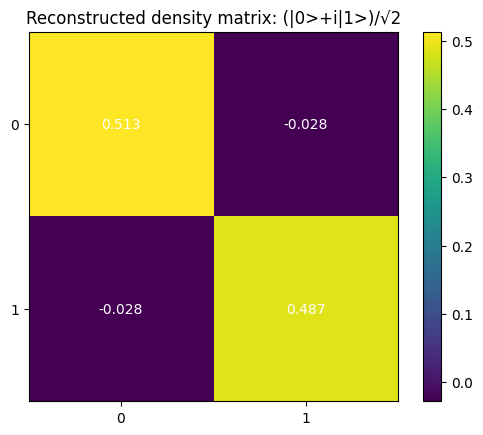

In [ ]:
# Markdown Explanation:
# Example: visualize the last reconstructed state
plot_density_matrix(
    rho_recon,
    title=f"Reconstructed density matrix: {state}"
)


In [ ]:
# Markdown Explanation:
# Convert a density matrix to its Bloch vector representation.
def bloch_vector(rho):
    """Compute the Bloch vector [x, y, z] of a single-qubit density matrix."""
    x = 2 * np.real(rho[0, 1])
    y = -2 * np.imag(rho[0, 1])
    z = np.real(rho[0, 0] - rho[1, 1])
    return np.array([x, y, z])

# Loop through all states and compute Bloch vector error
import pandas as pd

summary = []

for state in states:
    safe_state = state.replace("|", "").replace(">", "").replace("+","p").replace("-","m").replace("/","_").replace("√","sqrt").replace(" ","_")

    rho_recon = np.load(base_path / f"rho_reconstructed_{safe_state}.npy")
    rho_true = np.load(base_path / f"rho_ideal_{safe_state}.npy")

    F = fidelity(rho_true, rho_recon)
    D = trace_distance(rho_true, rho_recon)

    bloch_true = bloch_vector(rho_true)
    bloch_recon = bloch_vector(rho_recon)
    bloch_err = np.linalg.norm(bloch_true - bloch_recon)

    summary.append({
        "State": state,
        "Fidelity": F,
        "Trace Distance": D,
        "Bloch Error": bloch_err
    })

# Create a pandas DataFrame to display nicely
df_summary = pd.DataFrame(summary)
df_summary


,State,Fidelity,Trace Distance,Bloch Error
0,|0>,1.0,0.022204,0.044407
1,|1>,1.0,0.020248,0.040497
2,|+>,1.0,0.019416,0.038833
3,|->,1.0,0.036715,0.073430
4,(|0>+i|1>)/√2,0.0,1.000476,2.000953


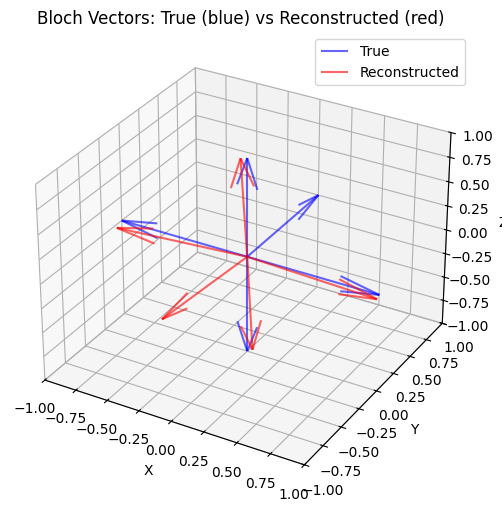

In [ ]:
# Markdown Explanation:
# Visualize the true vs reconstructed Bloch vectors in 3D space.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for state in states:
    safe_state = state.replace("|", "").replace(">", "").replace("+","p").replace("-","m").replace("/","_").replace("√","sqrt").replace(" ","_")

    rho_recon = np.load(base_path / f"rho_reconstructed_{safe_state}.npy")
    rho_true = np.load(base_path / f"rho_ideal_{safe_state}.npy")

    bloch_true = bloch_vector(rho_true)
    bloch_recon = bloch_vector(rho_recon)

    ax.quiver(0,0,0, *bloch_true, color='blue', alpha=0.6, label='True' if state == states[0] else "")
    ax.quiver(0,0,0, *bloch_recon, color='red', alpha=0.6, label='Reconstructed' if state == states[0] else "")

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bloch Vectors: True (blue) vs Reconstructed (red)")
ax.legend()
plt.show()


In [ ]:
# Markdown Explanation:
# Save the reconstruction metrics summary as CSV for reproducibility.
df_summary.to_csv(base_path / "single_qubit_summary.csv", index=False)
print(f"Saved summary metrics to {base_path / 'single_qubit_summary.csv'}")


Saved summary metrics to data/single_qubit/single_qubit_summary.csv


In [ ]:
# Markdown Explanation:
# Import required libraries for validation and visualization.
import pathlib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Base path for single-qubit data
base_path = pathlib.Path("data/single_qubit")


In [ ]:
# Markdown Explanation:
# Load reconstructed and ideal density matrices from Task 4 outputs.
states = ["|0>", "|1>", "|+>", "|->", "(|0>+i|1>)/√2"]

rho_data = {}

for state in states:
    safe_state = state.replace("|", "").replace(">", "").replace("+","p").replace("-","m")\
                      .replace("/","_").replace("√","sqrt").replace(" ","_")

    rho_recon = np.load(base_path / f"rho_reconstructed_{safe_state}.npy")
    rho_true = np.load(base_path / f"rho_ideal_{safe_state}.npy")

    rho_data[state] = {"reconstructed": rho_recon, "ideal": rho_true}


In [ ]:
# Markdown Explanation:
# Fidelity, trace distance, and Bloch vector error functions for validation.
def fidelity(rho, sigma):
    term1 = np.trace(rho @ sigma)
    term2 = 2 * np.sqrt(np.linalg.det(rho) * np.linalg.det(sigma))
    F = np.real(term1 + term2)
    return float(np.clip(F, 0.0, 1.0))

def trace_distance(rho, sigma):
    return 0.5 * norm(rho - sigma, ord="nuc")

def bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = -2 * np.imag(rho[0, 1])
    z = np.real(rho[0, 0] - rho[1, 1])
    return np.array([x, y, z])


In [ ]:
# Markdown Explanation:
# Compute fidelity, trace distance, and Bloch vector error for each state.
summary = []

for state in states:
    rho_true = rho_data[state]["ideal"]
    rho_recon = rho_data[state]["reconstructed"]

    F = fidelity(rho_true, rho_recon)
    D = trace_distance(rho_true, rho_recon)

    bloch_err = np.linalg.norm(bloch_vector(rho_true) - bloch_vector(rho_recon))

    summary.append({
        "State": state,
        "Fidelity": F,
        "Trace Distance": D,
        "Bloch Error": bloch_err
    })

df_summary = pd.DataFrame(summary)
df_summary


,State,Fidelity,Trace Distance,Bloch Error
0,|0>,1.0,0.022204,0.044407
1,|1>,1.0,0.020248,0.040497
2,|+>,1.0,0.019416,0.038833
3,|->,1.0,0.036715,0.073430
4,(|0>+i|1>)/√2,0.0,1.000476,2.000953


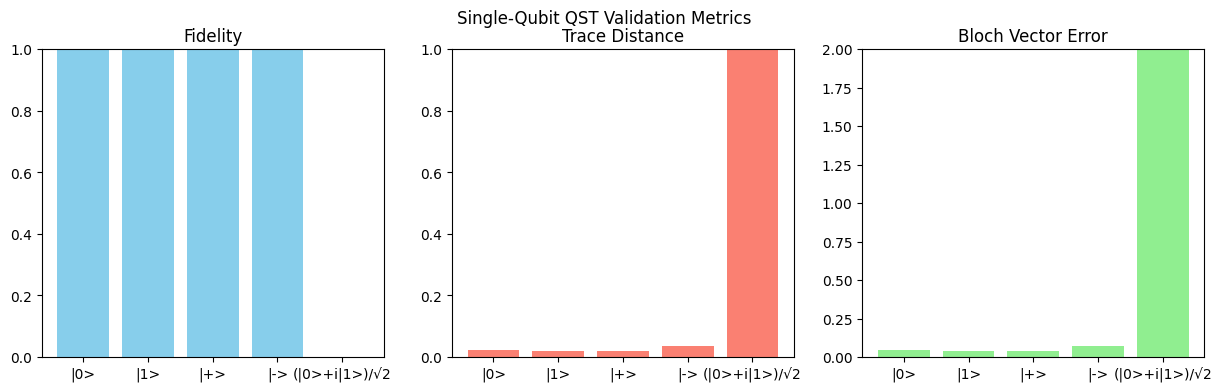

In [ ]:
# Markdown Explanation:
# Visualize fidelity, trace distance, and Bloch vector error for each state.
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(df_summary["State"], df_summary["Fidelity"], color="skyblue")
axes[0].set_title("Fidelity")
axes[0].set_ylim([0, 1])

axes[1].bar(df_summary["State"], df_summary["Trace Distance"], color="salmon")
axes[1].set_title("Trace Distance")
axes[1].set_ylim([0, 1])

axes[2].bar(df_summary["State"], df_summary["Bloch Error"], color="lightgreen")
axes[2].set_title("Bloch Vector Error")
axes[2].set_ylim([0, 2])

plt.suptitle("Single-Qubit QST Validation Metrics")
plt.show()


In [ ]:
# Markdown Explanation:
# Save the metrics summary as CSV and JSON for reproducibility.
df_summary.to_csv(base_path / "validation_summary.csv", index=False)
with open(base_path / "validation_summary.json", "w") as f:
    json.dump(summary, f, indent=4)

print(f"Validation metrics saved to {base_path / 'validation_summary.csv'} and .json")


Validation metrics saved to data/single_qubit/validation_summary.csv and .json


In [ ]:
!zip -r single_qubit.zip single_qubit_IQ


	zip warning: name not matched: single_qubit_IQ

zip error: Nothing to do! (try: zip -r single_qubit.zip . -i single_qubit_IQ)


In [ ]:
!zip -r data.zip data_IQ

	zip warning: name not matched: data_IQ

zip error: Nothing to do! (try: zip -r data.zip . -i data_IQ)


In [ ]:
!ls


 data				     density_matrix_Bell_Psi⁻.html
'density_matrix_|0.html'	    'density_matrix_|+.html'
'density_matrix_(|0_+_i|1)√2.html'  'density_matrix_|-.html'
'density_matrix_|1.html'	     drive
 density_matrix_Bell_Phi⁺.html	     qst_data
 density_matrix_Bell_Phi⁻.html	     reference_states.json
 density_matrix_Bell_Psi⁺.html	     sample_data


In [ ]:
!zip -r data.zip data


  adding: data/ (stored 0%)
  adding: data/single_qubit/ (stored 0%)
  adding: data/single_qubit/metrics_(0pi1)_sqrt2.json (deflated 30%)
  adding: data/single_qubit/rho_reconstructed_(0pi1)_sqrt2.npy (deflated 44%)
  adding: data/single_qubit/rho_reconstructed_p.npy (deflated 45%)
  adding: data/single_qubit/metrics_0.json (deflated 32%)
  adding: data/single_qubit/rho_ideal_m.npy (deflated 56%)
  adding: data/single_qubit/rho_ideal_0.npy (deflated 59%)
  adding: data/single_qubit/metrics_1.json (deflated 31%)
  adding: data/single_qubit/validation_summary.csv (deflated 31%)
  adding: data/single_qubit/rho_ideal_1.npy (deflated 59%)
  adding: data/single_qubit/rho_ideal_p.npy (deflated 58%)
  adding: data/single_qubit/rho_reconstructed_1.npy (deflated 48%)
  adding: data/single_qubit/rho_reconstructed_m.npy (deflated 45%)
  adding: data/single_qubit/validation_summary.json (deflated 68%)
  adding: data/single_qubit/metrics_p.json (deflated 31%)
  adding: data/single_qubit/single_qubit

In [ ]:
from google.colab import files
files.download('data.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r qst_data.zip qst_data
from google.colab import files
files.download('qst_data.zip')


  adding: qst_data/ (stored 0%)
  adding: qst_data/single_qubit_1_meta.json (deflated 23%)
  adding: qst_data/single_qubit_0.npy (deflated 30%)
  adding: qst_data/single_qubit_0_rho.npy (deflated 59%)
  adding: qst_data/single_qubit_0_meta.json (deflated 24%)
  adding: qst_data/single_qubit_-_rho.npy (deflated 56%)
  adding: qst_data/single_qubit_-.npy (deflated 27%)
  adding: qst_data/single_qubit_-_meta.json (deflated 23%)
  adding: qst_data/single_qubit_+.npy (deflated 27%)
  adding: qst_data/single_qubit_1_rho.npy (deflated 59%)
  adding: qst_data/single_qubit_+_rho.npy (deflated 58%)
  adding: qst_data/single_qubit_+_meta.json (deflated 23%)
  adding: qst_data/single_qubit_1.npy (deflated 31%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r sample_data.zip sample_data
from google.colab import files
files.download('sample_data.zip')


  adding: sample_data/ (stored 0%)
  adding: sample_data/README.md (deflated 39%)
  adding: sample_data/anscombe.json (deflated 83%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/mnist_test.csv (deflated 88%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/california_housing_train.csv (deflated 79%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip density_matrix_htmls.zip density_matrix_*.html
from google.colab import files
files.download('density_matrix_htmls.zip')


  adding: density_matrix_|0.html (deflated 71%)
  adding: density_matrix_(|0_+_i|1)√2.html (deflated 71%)
  adding: density_matrix_|1.html (deflated 71%)
  adding: density_matrix_Bell_Phi⁺.html (deflated 71%)
  adding: density_matrix_Bell_Phi⁻.html (deflated 71%)
  adding: density_matrix_Bell_Psi⁺.html (deflated 71%)
  adding: density_matrix_Bell_Psi⁻.html (deflated 71%)
  adding: density_matrix_|+.html (deflated 71%)
  adding: density_matrix_|-.html (deflated 71%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('reference_states.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>